### 선형으로 분리되는 데이타 실습하기

In [1]:
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
#training data와 test data를 나눔. -> train_test_split


#### Custom Funtion Definition

In [2]:
red_RGB = (1, 0, 0)
blue_RGB = (0, 0, 1)
data_colors = [red_RGB, blue_RGB]

def read_points_file(filename):
    points = []
    
    #파일 이름에 해당하는 것을 읽기모드로 불러와서 띄어쓰기 제거후 스플릿해준다. 
    with open(filename, "r") as f:
        for point in f:
            point = point.strip("\n").split()
            points.append([float(point[0]), float(point[1])])
    #list of floats를 리턴하는 것으로 상정한다. 
    return points
    

def read_data(class_0_file, class_1_file):
    #위에서 읽은 파일에서 얻은 좌표들의 list를 두개 갖고온다.
    points_label0 = read_points_file(class_0_file)
    points_label1 = read_points_file(class_1_file)
    
    #두 리스트를 합하여 넘파이 어레이화 시킨다.
    points = points_label0 + points_label1
    points = np.array(points)
    
    label0, label1 = [0], [1]
    
    #합치기 전의 길이를 받아주는 변수 num_of_label
    num_of_label0, num_of_label1 = len(points_label0), len(points_label1)
    
    #points0은 0으로 구분하고, point1은 1로 구분하는 lables를 만들어 구분전과 함께 리턴. 
    labels = label0 * num_of_label0 + label1 * num_of_label1
    
    return (points, labels)



#위에서 튜블로 지정한 R,B로 리턴해준다 
def get_colors(y):
    return [data_colors[label] for label in y]

def plot_data(X_train, y_train, X_test, y_test):
  
    X = np.concatenate((X_train, X_test)) #concatenate 배열을 하나로 합침
    y = np.concatenate((y_train, y_test))

    colors = get_colors(y)
    colors_train = get_colors(y_train)
    colors_test = get_colors(y_test)

    plt.figure(figsize=(8, 4))

    # Plot all data plot
    plt.subplot(131)
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    plt.title("Data (100%)")


    # training data plot
    plt.subplot(132)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_train[:, 0], X_train[:, 1], c = colors_train, s = 10, edgecolors=colors_train)
    plt.title("Training Data (80%)")

    # testing data plot
    plt.subplot(133)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_test[:, 0], X_test[:, 1], c = colors_test, s = 10, edgecolors=colors_test)
    plt.title("Test Data (20%)")
    plt.tight_layout()
    plt.show()

def plot_decision_function(X_train, y_train, X_test, y_test, clf):
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.title("Training data")
    plot_decision_function_helper(X_train, y_train, clf)
    plt.subplot(122)
    plt.title("Test data")
    plot_decision_function_helper(X_test, y_test, clf, True)
    plt.show()

def plot_decision_function_helper(X, y, clf, show_only_decision_function = False):

    colors = get_colors(y)
    plt.axis('equal')
    plt.tight_layout()
    #plt.axis('off')

    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    ax = plt.gca()  ## get current axes
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T # xy.shape = (900, 2)   ## ravel()은 flatten() 함수
    Z = clf.decision_function(xy).reshape(XX.shape)
    # clf.decision_function(xy).shape = (900,)
    # Z.shape = (30, 30)

    if  show_only_decision_function:
    # Plot decision boundary
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                 linestyles=['-'])
    else :
    # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])

#### 1. DataLoader

In [3]:
#노이즈가 전혀 없어서 아주 깔끔하게 선형 구분이 가능한 데이터를 다루겠다. 

X, labels = read_data("../data/points_class_0.txt","../data/points_class_1.txt")

#.txt를 읽을 때는 그냥 read_data.
#두개 이상을 읽을때는 저렇게 콤마로 연결해서 간다. 

#### 2. Data Split

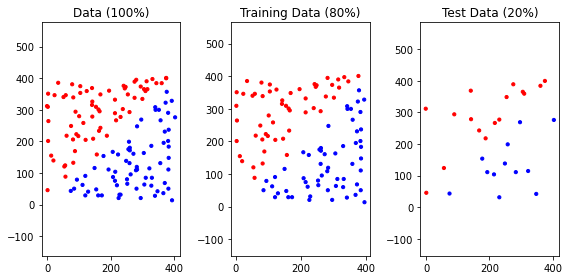

In [4]:
#Split data to train and test on 80-20 ratio
#변수명은 convention을 따라 X, y
X_train,X_test, y_train, y_test = train_test_split(X,labels,test_size=0.2,random_state=0)


#Plot Data
plot_data(X_train,y_train,X_test,y_test)


#### 3. Model Generator and Training

In [5]:
#generating model

#곧은 선형으로 단순분류를 하고자 한다면 kernel ='linear'를 지정

#변수명은 classification의 약자 clf
clf = svm.SVC(kernel = "linear")  
clf.fit(X_train,y_train) #fit은 training data 함수이다. 






SVC(kernel='linear')

#### 4. Predict and Accuracy Score

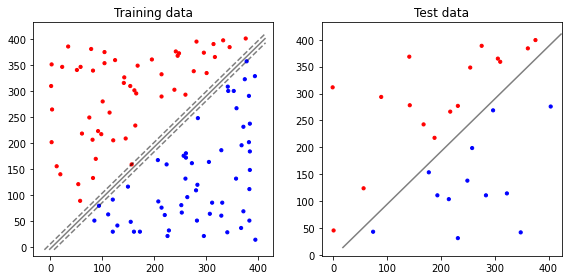

Accuracy :1.0%


In [6]:

clf_pred = clf.predict(X_test)

#Plot Data - custom function으로! 
plot_decision_function(X_train,y_train,X_test,y_test,clf)


#svm.SVC에 있는 메소드를 사용해 스코어를 보자.
print("Accuracy :{}%".format(clf.score(X_test,y_test)))

#svm.SVC.score(test,label) 내부적으로 X_test를 가지고 predict를 내부적으로 하고,


### 선형으로 분리되지 않는 데이타 실습하기
- 이전데이터와는 조금 다르게 노이즈값이 조금 끼어져 있는 학습데이터를 다룬다. <br>
- 이럴 때는 cost파라미터를 사용해서 Decision Boundary를 조정할 수 있다.<br>
- 또한 선형으로 분리되지 않는 데이터는 다른 파라미터 값으로 조정해야 한다.

#### 1. Data Loader

In [7]:
#
X, labels = read_data("../data/points_class_0_nonLinear.txt","../data/points_class_1_nonLinear.txt")


#### 2. Data Split

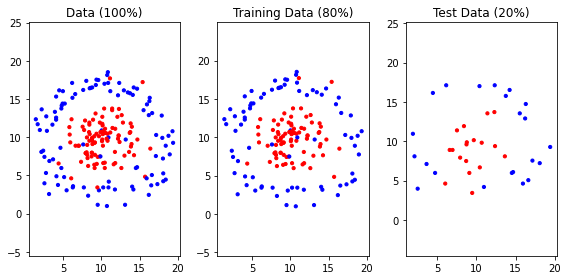

In [8]:
# Split data to train and test on 80-20 ratio

X_train, X_test, y_train, y_test = train_test_split(X,labels,test_size=0.2,random_state=0)

#Plot Data
plot_data(X_train,y_train,X_test,y_test)

#### 3. Model Generator 
- C와 gamma의 값을 어떻게 정하는가?
- recommended value가 있다.
- 그러나 그럼에도, 이러한 하이퍼 파라미터들의 값을 정하는데는 단순히 '감' 뿐만 아니라 교차검증이 요구된다.
- 하이퍼 파라미터?
    - Model이 학습을 통해서 찾아낼 수 없는 값. 
    - 인간이 경험에 의해서 얻어내야 하는 값이다.


In [9]:
# radial basis function(가우시안 방사 기저함수) 

clf = svm.SVC(kernel = 'rbf', C=10.0 , gamma=0.1)


#C와 gamma의 값을 어떻게 정하는가?
#recommended value가 있다.
#그러나 그럼에도, 이러한 하이퍼 파라미터들의 값을 정하는데는 단순히 '감' 뿐만 아니라 교차검증이 요구된다.




#### 4. Training and Predict

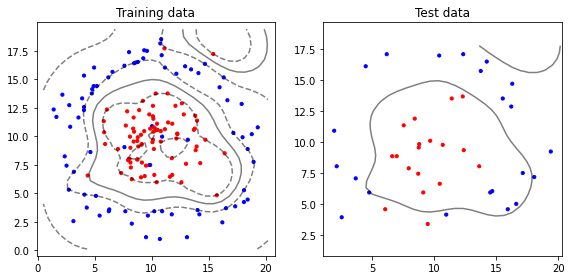

In [12]:
#
clf.fit(X_train,y_train)
clf_pred = clf.predict(X_test)

#Plot Data
plot_decision_function(X_train,y_train,X_test,y_test,clf)


#### 5. GridSearch
- cost, gamma에 해당하는 여러개의 값들을 그리드한 방식으로 표현해보겠다는 방법론
- 최적의 파라미터 값을 찾도록 내부적으로 교차검증이 이뤄진다.

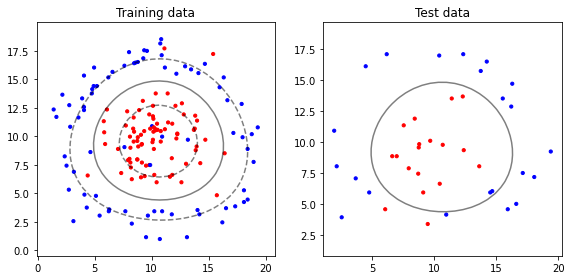

Best Parameters :
 {'C': 1, 'gamma': 0.01}
Best Estimators :
 SVC(C=1, gamma=0.01)


In [13]:
param_id = {'C':[0.1,1,10,100],"gamma":[1,0.1,0.01,0.001,10]}

#grid를 생성, 모델과 딕트타입의 파라미터가 인자로 들어간다.
clf_grid = GridSearchCV(svm.SVC(),param_grid=param_id)

clf_grid.fit(X_train,y_train)
plot_decision_function(X_train,y_train,X_test,y_test,clf_grid)



#best hyper parameter값을 찾아준다. (학습시)
#그 이후 테스트를 거쳐서 성능이 떨어진다고 하면 파라미터를 바꿔서 베스트 파라미터를 찾아서 
#다시 돌려보는 식.. (노가다)
print("Best Parameters :\n", clf_grid.best_params_)
print("Best Estimators :\n", clf_grid.best_estimator_)